In [2]:
import pandas as pd

PATH = 'e-commerce_RFM.csv'

df = pd.read_csv(PATH, encoding='unicode_escape')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
TotalPrice            float64
dtype: object

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [4]:
totalprice_by_country = df.groupby('Country')['TotalPrice'].sum()
totalprice_by_country = totalprice_by_country.sort_values(ascending=False)
top10_country_sales   = totalprice_by_country.head(10)
top10_country_sales

Country
United Kingdom    7031228.694
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: TotalPrice, dtype: float64

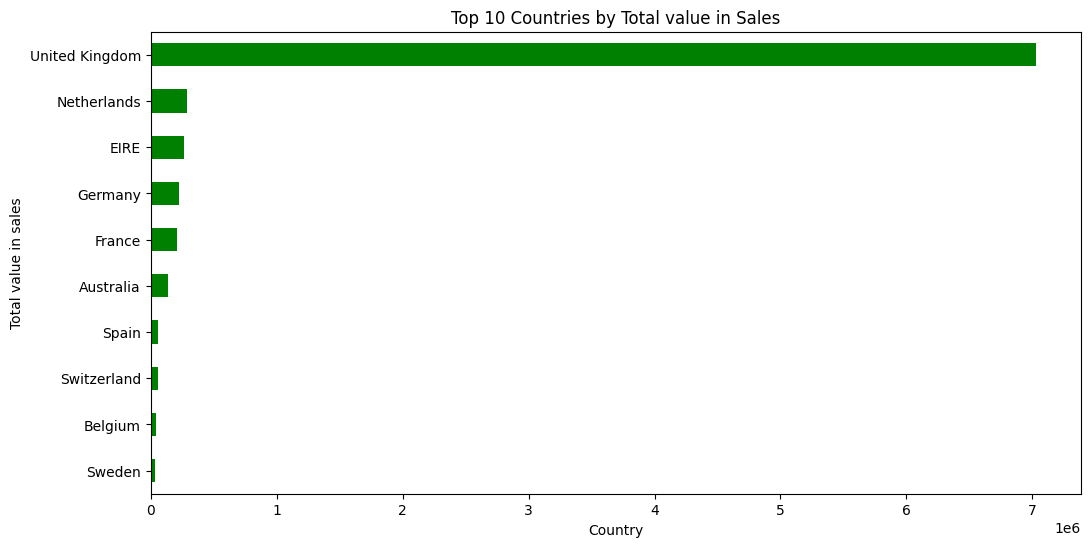

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top10_country_sales.sort_values(ascending=True).plot(kind='barh', color='green')
plt.title('Top 10 Countries by Total value in Sales')
plt.xlabel('Country')
plt.ylabel('Total value in sales')
plt.show()

In [6]:
products_by_quantity = df.groupby('Description')['Quantity'].sum()
products_by_quantity = products_by_quantity.sort_values(ascending=False)
top10_product_sales  = products_by_quantity.head(10)

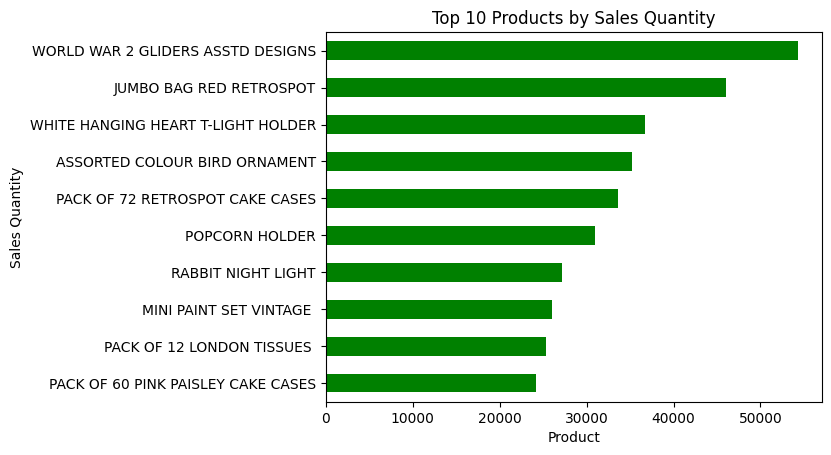

In [7]:
top10_product_sales.sort_values(ascending=True).plot(kind='barh', color='green')
plt.title('Top 10 Products by Sales Quantity')
plt.xlabel('Product')
plt.ylabel('Sales Quantity')
plt.show()

In [8]:
df_month = df

df_month['Month']   = df_month['InvoiceDate'].dt.to_period('M')
totalprice_by_month = df_month.groupby('Month')['TotalPrice'].sum()
totalprice_by_month

Month
2010-12     570422.730
2011-01     490917.710
2011-02     446084.920
2011-03     594081.760
2011-04     468374.331
2011-05     669212.400
2011-06     660046.050
2011-07     598962.901
2011-08     644051.040
2011-09     950690.202
2011-10    1035642.450
2011-11    1156205.610
2011-12     348720.840
Freq: M, Name: TotalPrice, dtype: float64

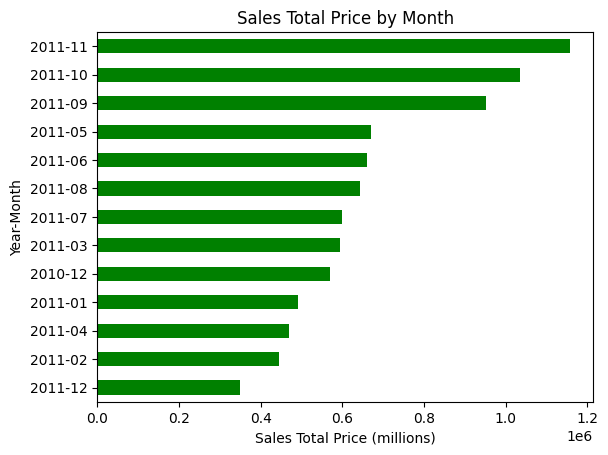

In [9]:
totalprice_by_month.sort_values(ascending=True).plot(kind='barh', color='green')
plt.title('Sales Total Price by Month')
plt.ylabel('Year-Month')
plt.xlabel('Sales Total Price (millions)')

plt.show()

In [10]:
top10_list = top10_country_sales.index.to_list()
filter     = df['Country'].isin(top10_list)
df_top10   = df[filter]
df_top10['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'EIRE', 'Switzerland', 'Spain', 'Belgium', 'Sweden'], dtype=object)

In [11]:
df_top10['Month'] = df_top10['InvoiceDate'].dt.to_period('M')
country_month     = df.groupby(['Country', 'Month'])['TotalPrice'].sum()
country_month.index

C:\Users\jeanl\AppData\Local\Temp\ipykernel_18236\1432778105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10['Month'] = df_top10['InvoiceDate'].dt.to_period('M')


MultiIndex([(     'Australia', '2010-12'),
            (     'Australia', '2011-01'),
            (     'Australia', '2011-02'),
            (     'Australia', '2011-03'),
            (     'Australia', '2011-04'),
            (     'Australia', '2011-05'),
            (     'Australia', '2011-06'),
            (     'Australia', '2011-07'),
            (     'Australia', '2011-08'),
            (     'Australia', '2011-09'),
            ...
            ('United Kingdom', '2011-08'),
            ('United Kingdom', '2011-09'),
            ('United Kingdom', '2011-10'),
            ('United Kingdom', '2011-11'),
            ('United Kingdom', '2011-12'),
            (   'Unspecified', '2011-04'),
            (   'Unspecified', '2011-05'),
            (   'Unspecified', '2011-06'),
            (   'Unspecified', '2011-07'),
            (   'Unspecified', '2011-08')],
           names=['Country', 'Month'], length=287)

In [12]:
df['Recency'] = df['InvoiceDate'].max() - df['InvoiceDate']
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,373 days 04:24:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2010-12,373 days 04:24:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2010-12,373 days 04:24:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,373 days 04:22:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,373 days 04:22:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010-12,373 days 04:16:00


In [13]:
recency = df.groupby('CustomerID')['Recency'].min()
recency

CustomerID
12347     1 days 20:58:00
12348    74 days 23:37:00
12349    18 days 02:59:00
12350   309 days 20:49:00
12352    35 days 22:13:00
               ...       
18280   277 days 02:58:00
18281   180 days 01:57:00
18282     7 days 01:07:00
18283     3 days 00:48:00
18287    42 days 03:21:00
Name: Recency, Length: 4337, dtype: timedelta64[ns]

In [24]:
frequency = df.groupby('CustomerID')['Quantity'].sum()
frequency

CustomerID
12347    2458
12348    2341
12349     631
12350     197
12352     536
         ... 
18280      45
18281      54
18282     103
18283    1357
18287    1586
Name: Quantity, Length: 4337, dtype: int64

In [28]:
mticket = df.groupby('CustomerID')['TotalPrice'].mean()
mticket

CustomerID
12347    23.681319
12348    57.975484
12349    24.076027
12350    19.670588
12352    29.482824
           ...    
18280    18.060000
18281    11.545714
18282    14.837500
18283     2.837074
18287    26.246857
Name: TotalPrice, Length: 4337, dtype: float64